In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [127]:
gencode_f = '/cndd/Public_Datasets/CEMBA/References/Annotation/gencode.vM16.annotation.gtf.gz'
df_raw = pd.read_table(gencode_f, skiprows=5, header=None)

In [128]:
print(df_raw.shape)

df_raw.columns = ['chr', 'source', 'type', 'start', 'end', 'score', 'strand', 'phase', 'add_info']
df_raw.head()

(1771112, 9)


,chr,source,type,start,end,score,strand,phase,add_info
0,chr1,HAVANA,gene,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; gene_type ""TEC..."
1,chr1,HAVANA,transcript,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
2,chr1,HAVANA,exon,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693.1""; transcript_id ..."
3,chr1,ENSEMBL,gene,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; gene_type ""snR..."
4,chr1,ENSEMBL,transcript,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842.1""; transcript_id ..."


In [133]:
# get df_gene
df_gene_raw = df_raw[df_raw.type=='gene']
print(df_gene_raw.shape)

# get add_info
list_dict_add_info = []
for idx, row in df_gene_raw.iterrows():
    dict_add_info = dict([ai.strip(';').replace('"', '').split(' ') for ai in row['add_info'].split('; ')])
    list_dict_add_info.append(dict_add_info)
df_add_info = pd.DataFrame(list_dict_add_info, index=df_gene_raw.index)

df_gene_raw = pd.merge(df_gene_raw, df_add_info, left_index=True, right_index=True)
print(df_gene_raw.shape)
df_gene = df_gene_raw[['gene_id', 'gene_name', 'chr', 'start', 'end', 'strand', 'gene_type', 'level']]
print(df_gene.shape)
df_gene.head()

(53379, 9)
(53379, 15)
(53379, 8)


,gene_id,gene_name,chr,start,end,strand,gene_type,level
0,ENSMUSG00000102693.1,4933401J01Rik,chr1,3073253,3074322,+,TEC,2
3,ENSMUSG00000064842.1,Gm26206,chr1,3102016,3102125,+,snRNA,3
6,ENSMUSG00000051951.5,Xkr4,chr1,3205901,3671498,-,protein_coding,2
24,ENSMUSG00000102851.1,Gm18956,chr1,3252757,3253236,+,processed_pseudogene,1
27,ENSMUSG00000103377.1,Gm37180,chr1,3365731,3368549,-,TEC,2


In [166]:

chroms = [str(i+1) for i in range(19)] + ['X'] + ['Y']
chr_chroms = ['chr'+chrom for chrom in chroms]

# remove other chromosomes
df_gene = df_gene[df_gene.chr.isin(chr_chroms)]
print(df_gene.shape)

df_gene.groupby('gene_type').count()

df_gene.groupby('chr').count()
# df_gene_pc = df_gene[df_gene.gene_type=='protein_coding']
# print(df_gene_pc.shape)

(53342, 8)


,gene_id,gene_name,start,end,strand,gene_type,level
chr,,,,,,,
chr1,3441,3441,3441,3441,3441,3441,3441
chr10,2629,2629,2629,2629,2629,2629,2629
chr11,3011,3011,3011,3011,3011,3011,3011
chr12,2466,2466,2466,2466,2466,2466,2466
chr13,2499,2499,2499,2499,2499,2499,2499
chr14,2532,2532,2532,2532,2532,2532,2532
chr15,1599,1599,1599,1599,1599,1599,1599
chr16,1198,1198,1198,1198,1198,1198,1198
chr17,1729,1729,1729,1729,1729,1729,1729


In [168]:
gene_lengths = (df_gene.end - df_gene.start + 1)

print(df_gene[gene_lengths > 2000].shape)
print(df_gene[gene_lengths > 2000].head())

(31047, 8)
                 gene_id gene_name   chr    start      end strand  \
6   ENSMUSG00000051951.5      Xkr4  chr1  3205901  3671498      -   
27  ENSMUSG00000103377.1   Gm37180  chr1  3365731  3368549      -   
30  ENSMUSG00000104017.1   Gm37363  chr1  3375556  3377788      -   
33  ENSMUSG00000103025.1   Gm37686  chr1  3464977  3467285      -   
36  ENSMUSG00000089699.1    Gm1992  chr1  3466587  3513553      +   

         gene_type level  
6   protein_coding     2  
27             TEC     2  
30             TEC     2  
33             TEC     2  
36   antisense_RNA     2  


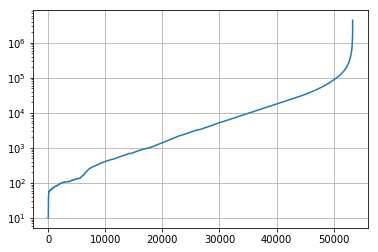

In [169]:
fig, ax = plt.subplots()
ax.plot(sorted(gene_lengths))
ax.grid()
ax.set_yscale("log")
plt.show()

In [160]:
dict_seq = dict()
print(chroms)

for chrom in chroms:
    chr_chrom = 'chr' + chrom
    genome_f = '/cndd/Public_Datasets/CEMBA/References/Genome/%s.fa.gz' % chr_chrom
    df_genome = pd.read_table(genome_f, skiprows=1, header=None)
    dict_seq[chr_chrom] = ''.join(df_genome[0].tolist())

dict_seq


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'X', 'Y']


In [161]:
for key, value in dict_seq.items():
    print(key)
    print(len(value))

chr17
94987271
chr1
195471971
chr19
61431566
chr7
145441459
chr18
90702639
chr2
182113224
chr9
124595110
chr12
120129022
chr3
160039680
chrY
91744698
chr4
156508116
chr11
122082543
chr14
124902244
chr8
129401213
chr6
149736546
chrX
171031299
chr5
151834684
chr15
104043685
chr10
130694993
chr16
98207768
chr13
120421639


In [192]:
gene_cs = []
for idx, row in df_gene.iterrows():
    gene_seq = dict_seq[row.chr][(row.start-1):row.end]
    num_c = gene_seq.upper().count('C')
    num_ca = gene_seq.upper().count('CA')
    num_cg = gene_seq.upper().count('CG')
    num_ch = num_c - num_cg 
    gene_cs.append({'C': num_c, 
                    'CA': num_ca, 
                    'CG': num_cg, 
                    'CH': num_ch})
    
gene_cs = pd.DataFrame(gene_cs, index=df_gene.index)

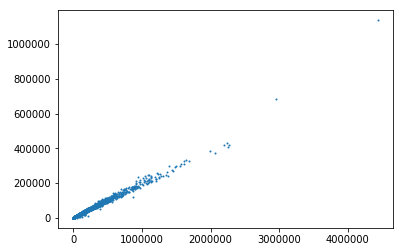

In [197]:
gene_cs['length'] = gene_lengths
fig, ax = plt.subplots()
ax.scatter(gene_lengths, gene_cs.C, s=1)
plt.show()

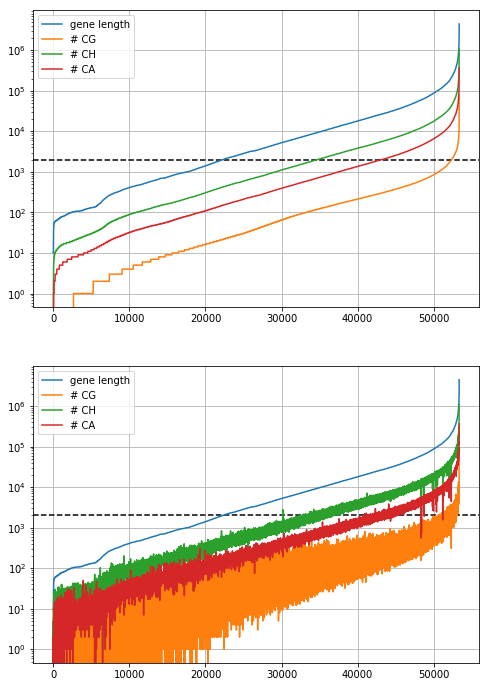

In [212]:
gene_cs.sort_values('length', inplace=True)

fig, axs = plt.subplots(2, 1, figsize=(8, 12))
ax = axs[0]
ax.axhline(y=2000, color='black', linestyle='--')
ax.plot(sorted(gene_cs.length), label='gene length')
ax.plot(sorted(gene_cs.CG), label='# CG')
ax.plot(sorted(gene_cs.CH), label='# CH')
ax.plot(sorted(gene_cs.CA), label='# CA')
ax.grid()
ax.legend()
ax.set_yscale("log")

ax = axs[1]
ax.axhline(y=2000, color='black', linestyle='--')
ax.plot(gene_cs.length.values, label='gene length')
ax.plot(gene_cs.CG.values, label='# CG')
ax.plot(gene_cs.CH.values, label='# CH')
ax.plot(gene_cs.CA.values, label='# CA')
ax.grid()
ax.legend()
ax.set_yscale("log")
plt.show()